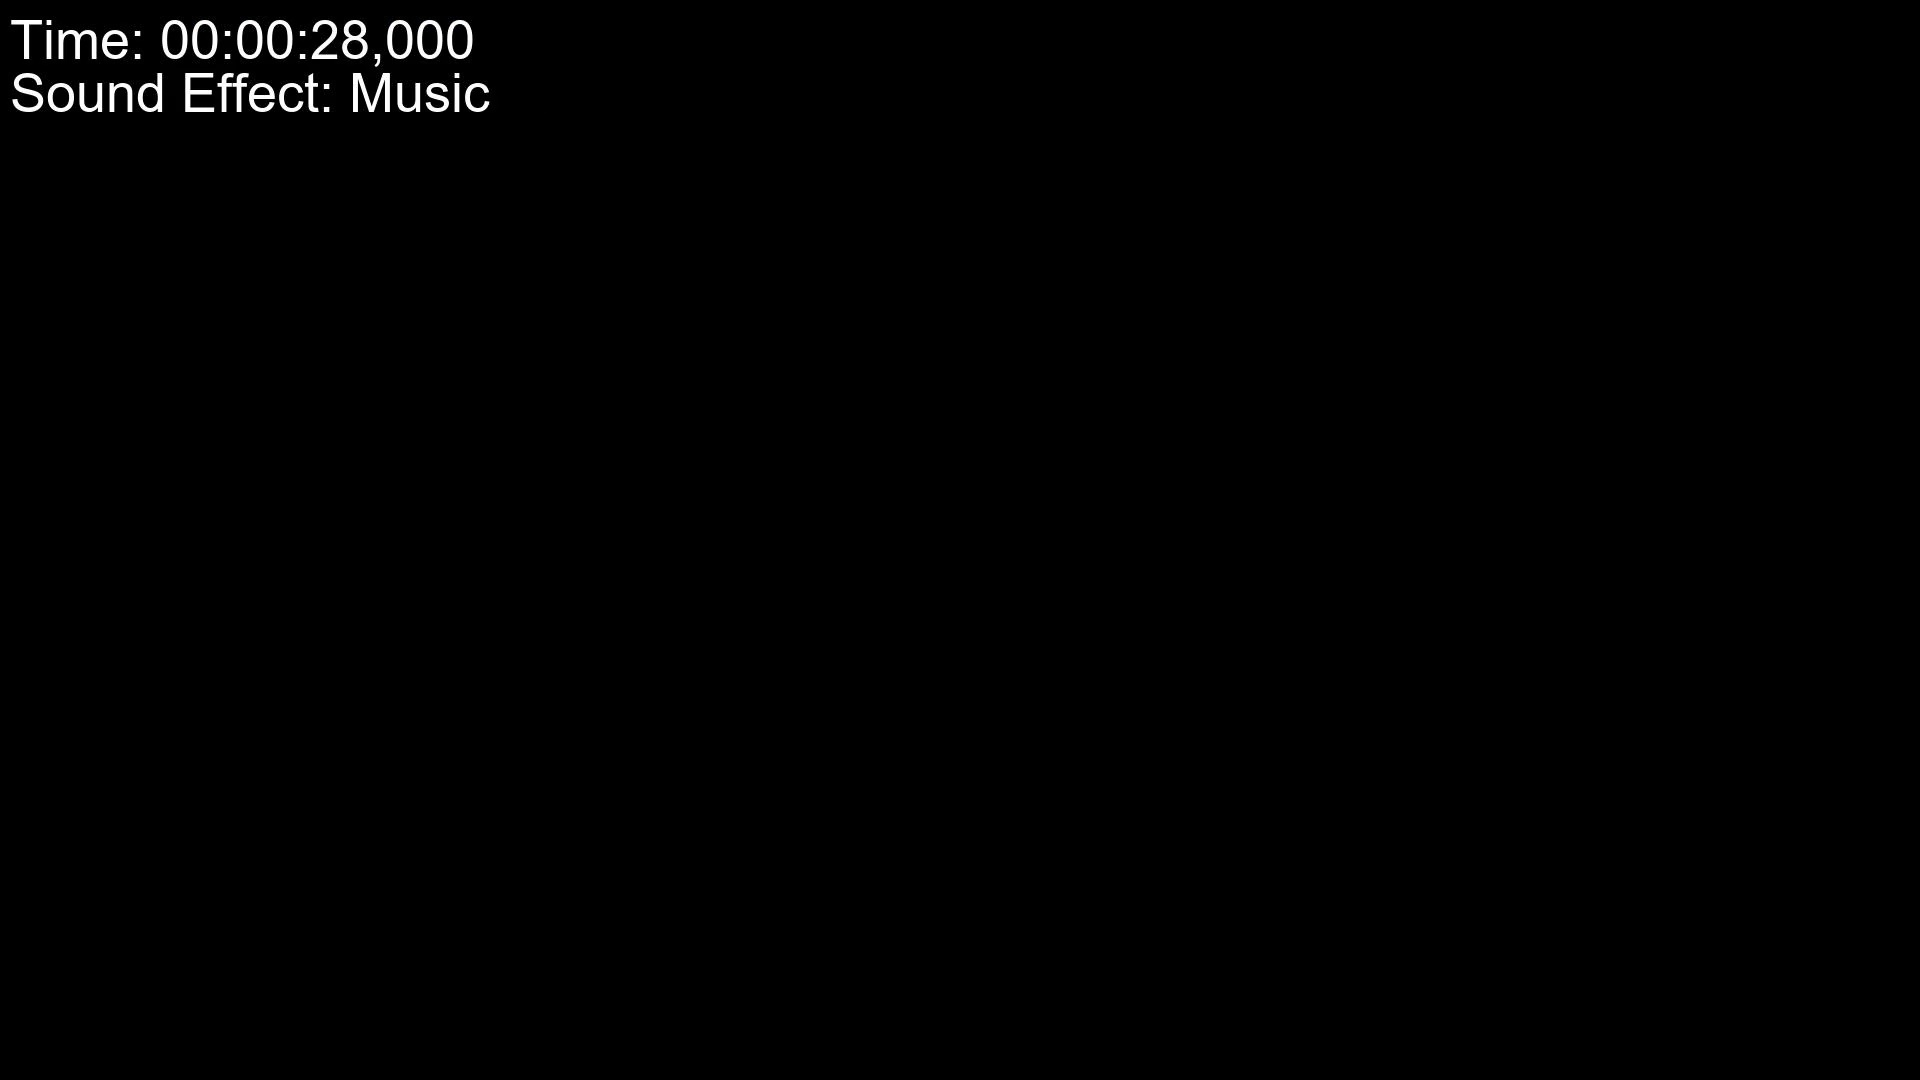

Length of image array: 85


In [5]:
from openai import OpenAI
from IPython.display import display, Image, Audio
import cv2
import base64
import time

client = OpenAI()

base64Frames = []
video = cv2.VideoCapture("./videos/output.mp4")
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

# check loading of video
display_handle = display(None, display_id=True)
print(f"Length of image array: {len(base64Frames)}")
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(1/48)

In [6]:
prompt = """
These are frames from a video that I want to upload. 
Can you make a recap of what happens in the video, taking note of major changes of events in the video. 
Be detailed as to create an audio descriptive aid. Speak naturally and in a way that would be helpful to someone who is visually impaired.
Minimize the number of seperate Time events you use, which means grouping together events as much as possible.
Attempt to interpret the events in the video where possible, but do not provide any information that is not available.
Sound effects are provided to give you more context for what is occurring at each frame, use them to help describe events but do not mention the provision of this context.
Do not provide an overall summary.
Your output should be only the content of a .srt file.
For each caption in the srt, it is very important that it is able to be spoken within the timestamps you provide such that it can be read out loud within the duration of the timestamp.
With this in mind, prefer to create longer timestamp splits for each caption to ensure that the captions are understandable.
It is of upmost importance that the captions are accurate, the timings do not overlap, and that the captions are within the duration of the video.
"""
reducedFrames = base64Frames[0::4]

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            prompt,
            *map(lambda x: {"image": x, "resize": 150}, reducedFrames),
        ],
    },
]

print(f"Processing {len(reducedFrames)} frames...")

params = {
    "model": "gpt-4o-mini",
    "messages": PROMPT_MESSAGES,
}
result = None
try:
    print("Creating completions...")
    result = client.chat.completions.create(**params)
    print(f"Completion tokens used: {result.usage.completion_tokens}")
    print(f"Prompt tokens used: {result.usage.prompt_tokens}")
    print(f"Total tokens used: {result.usage.total_tokens}")
except Exception as e:
    print(f"An error occurred: {e}")
print(result.choices[0].message.content)

Processing 22 frames...
Creating completions...
Completion tokens used: 298
Prompt tokens used: 81110
Total tokens used: 81408
```srt
1
00:00:00,000 --> 00:00:05,000
The scene opens in a cozy room, where a girl sits on a bed, tapping on her laptop. Outside, rain pours against the window.

2
00:00:05,000 --> 00:00:09,000
Suddenly, there is a loud explosion sound, startling the girl, and she reacts with surprise.

3
00:00:09,000 --> 00:00:14,000
The atmosphere shifts with the sound of a thunderstorm, intensifying as she turns to look out the window at the rain-soaked flowers.

4
00:00:14,000 --> 00:00:19,000
She stands up, feeling curious and determined, moving toward the window and bending to observe the garden.

5
00:00:19,000 --> 00:00:22,000
Next, she collects a flower from the garden, holding it delicately as she admires its beauty in the rain.

6
00:00:22,000 --> 00:00:26,000
A seamless transition shows her preparing to go outside, donning a yellow raincoat and hat.

7
00:00:26,000